In [59]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import r_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

In [7]:
car_details_v3 = pd.read_csv('Car details v3.csv')
car_details_v3

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [10]:
data = car_details_v3

In [74]:
len(data['seats'].unique())

10

In [23]:
np.median(data['year'].to_numpy())

2015.0

array([[<AxesSubplot: title={'center': 'year'}>]], dtype=object)

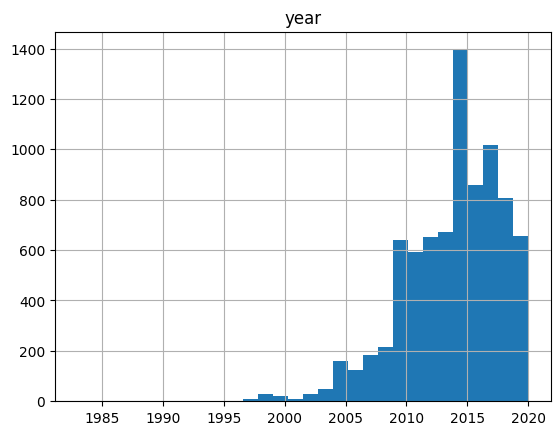

In [24]:
data.hist('year', bins=30)

In [26]:
print('mean:', data['selling_price'].mean())
print('median:', np.median(data['selling_price']))

mean: 638271.8077017716
median: 450000.0


array([[<AxesSubplot: title={'center': 'selling_price'}>]], dtype=object)

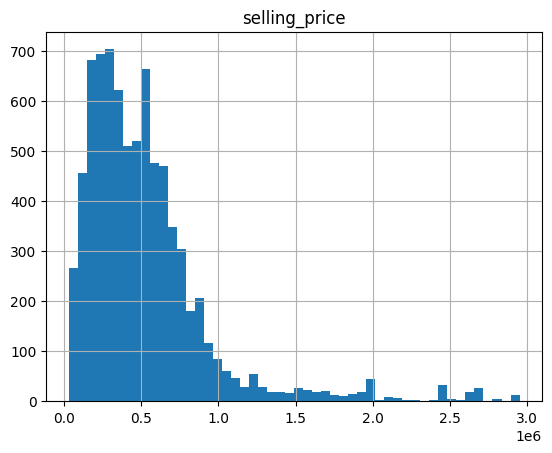

In [34]:
data.loc[data['selling_price'] < 3e6].hist('selling_price', bins=50)

In [48]:
pirs_yearVprice = r_regression(data[['year', 'km_driven']], data['selling_price'])

In [52]:
dataset1 = data[['selling_price', 'year']]

,selling_price,year
0,450000,2014
1,370000,2014
2,158000,2006
3,225000,2010
4,130000,2007
...,...,...
8123,320000,2013
8124,135000,2007
8125,382000,2009
8126,290000,2013


In [58]:
scaled = StandardScaler()
scaled.fit(dataset1[['year']])
x = scaled.transform(dataset1[['year']])

In [62]:
lin_regr_year = LinearRegression()
cr_val_res = cross_validate(lin_regr_year, x, dataset1['selling_price'], return_train_score=True)
cr_val_res

{'fit_time': array([0.00287795, 0.00155473, 0.00174594, 0.00167418, 0.00153399]),
 'score_time': array([0.00079799, 0.00061011, 0.00065994, 0.00060582, 0.00058293]),
 'test_score': array([0.16038522, 0.1741621 , 0.17510257, 0.15773226, 0.17217384]),
 'train_score': array([0.17466624, 0.17046406, 0.16840172, 0.17284859, 0.17129095])}

In [72]:
lin_regr_year = LinearRegression()
cr_val_res = cross_validate(lin_regr_year, x, dataset1['selling_price'], return_train_score=True, scoring='neg_mean_absolute_error')
cr_val_res

{'fit_time': array([0.00303006, 0.00216603, 0.00150585, 0.00143003, 0.00160122]),
 'score_time': array([0.00062275, 0.00064397, 0.00051594, 0.0005188 , 0.00068879]),
 'test_score': array([-408815.94488137, -378062.73037389, -399573.95017019,
        -359762.74311646, -380428.08783907]),
 'train_score': array([-374232.1698732 , -391661.49128312, -371309.61250575,
        -399824.24105124, -387975.7606659 ])}

In [67]:
lin_regr_year_test = LinearRegression()
lin_regr_year_test.fit(x, dataset1['selling_price'])
prices_received = lin_regr_year_test.predict(x)

In [71]:
print(dataset1['selling_price'][:10])
prices_received[:10]

0    450000
1    370000
2    158000
3    225000
4    130000
5    440000
6     96000
7     45000
8    350000
9    200000
Name: selling_price, dtype: int64


array([ 654451.21006478,  654451.21006478,   -5969.04056429,
        324241.08475024,   76583.49076434,  902108.80405068,
         76583.49076434, -418731.69720746,  406793.61607888,
        571898.67873614])

# **ДЗ**

1. Доисследовать данные (кореляции, уникальные ...): почитать про OneHotEncoder, способ превратить категориальный пизнак в численный
2. Построить парные графики в заивиисмости от влияния признаков на цены
3. 